# Final Project - Part 1

In [1]:
#import dependencies
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# add import warnigns to skip any warning messages on the screen
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import the csv files
game_plays = pd.read_csv("game_plays.csv")
games = pd.read_csv('game.csv')
team_info = pd.read_csv("team_info.csv")
team_stats = pd.read_csv("game_teams_stats.csv")
teams = team_info.merge(team_stats, on='team_id')

# Check first dataset - game_plays

In [7]:
game_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050529 entries, 0 to 5050528
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   play_id              object 
 1   game_id              int64  
 2   team_id_for          float64
 3   team_id_against      float64
 4   event                object 
 5   secondaryType        object 
 6   x                    float64
 7   y                    float64
 8   period               int64  
 9   periodType           object 
 10  periodTime           int64  
 11  periodTimeRemaining  float64
 12  dateTime             object 
 13  goals_away           int64  
 14  goals_home           int64  
 15  description          object 
 16  st_x                 float64
 17  st_y                 float64
dtypes: float64(7), int64(5), object(6)
memory usage: 693.6+ MB


In [8]:
game_plays.describe()

,game_id,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
count,5.050529e+06,4.117824e+06,4.117824e+06,3.916165e+06,3.916196e+06,5.050529e+06,5.050529e+06,4.857510e+06,5.050529e+06,5.050529e+06,3.916165e+06,3.916165e+06
mean,2.014891e+09,1.774251e+01,1.769530e+01,1.870930e-01,-1.592162e-01,2.027452e+00,5.873354e+02,5.977131e+02,1.245695e+00,1.378458e+00,1.002389e+01,1.851768e-01
std,3.627240e+06,1.246832e+01,1.244507e+01,6.428284e+01,2.297686e+01,8.735167e-01,3.657126e+02,3.645106e+02,1.318483e+00,1.418523e+00,6.349677e+01,2.297670e+01
min,2.000020e+09,1.000000e+00,1.000000e+00,-1.000000e+02,-4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02,-4.200000e+01
25%,2.012030e+09,8.000000e+00,8.000000e+00,-6.900000e+01,-2.200000e+01,1.000000e+00,2.670000e+02,2.800000e+02,0.000000e+00,0.000000e+00,-6.200000e+01,-2.200000e+01
50%,2.015030e+09,1.600000e+01,1.600000e+01,0.000000e+00,0.000000e+00,2.000000e+00,5.810000e+02,5.980000e+02,1.000000e+00,1.000000e+00,3.300000e+01,0.000000e+00
75%,2.018021e+09,2.400000e+01,2.400000e+01,6.900000e+01,2.200000e+01,3.000000e+00,9.040000e+02,9.150000e+02,2.000000e+00,2.000000e+00,6.900000e+01,2.200000e+01
max,2.019041e+09,9.000000e+01,9.000000e+01,1.000000e+02,4.200000e+01,8.000000e+00,1.200000e+03,1.200000e+03,1.100000e+01,1.200000e+01,1.000000e+02,4.200000e+01


In [10]:
# check all non-numeric columns
game_plays.describe(include=np.object)

,play_id,event,secondaryType,periodType,dateTime,description
count,5050529,5050529,1182016,5050529,5050529,5050529
unique,4217063,22,98,3,3678870,1314522
top,2019020867_28,Faceoff,Wrist Shot,REGULAR,2019-03-31 00:00:00,Goalie Stopped
freq,2,894041,489877,4940391,3402,252802


In [11]:
#check data for any strong correlation - correlation matrix
game_plays.corr()

,game_id,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
game_id,1.000000,0.093347,0.092299,-0.003256,0.004185,-0.012410,-0.005665,0.001176,0.012450,0.005022,-0.004453,0.001835
team_id_for,0.093347,1.000000,0.159276,-0.000815,-0.003308,-0.003920,-0.001440,-0.000051,-0.004925,0.002355,0.004039,0.004563
team_id_against,0.092299,0.159276,1.000000,0.002299,-0.003512,-0.002557,-0.000942,-0.000962,-0.004183,0.003826,-0.000033,0.000898
x,-0.003256,-0.000815,0.002299,1.000000,-0.005334,0.001091,-0.001527,0.001131,-0.002347,0.004100,-0.002086,-0.004359
y,0.004185,-0.003308,-0.003512,-0.005334,1.000000,0.002893,-0.000006,-0.000561,0.002394,0.001864,-0.003295,-0.003906
period,-0.012410,-0.003920,-0.002557,0.001091,0.002893,1.000000,-0.053974,-0.061168,0.535031,0.536201,0.008662,0.001171
periodTime,-0.005665,-0.001440,-0.000942,-0.001527,-0.000006,-0.053974,1.000000,-0.946053,0.172940,0.184314,-0.009919,0.000678
periodTimeRemaining,0.001176,-0.000051,-0.000962,0.001131,-0.000561,-0.061168,-0.946053,1.000000,-0.215686,-0.219280,-0.000175,-0.000265
goals_away,0.012450,-0.004925,-0.004183,-0.002347,0.002394,0.535031,0.172940,-0.215686,1.000000,0.357782,0.008067,0.000698
goals_home,0.005022,0.002355,0.003826,0.004100,0.001864,0.536201,0.184314,-0.219280,0.357782,1.000000,0.004730,0.000557


In [12]:
# Clean version of correlation matrix (visualize)
corr = game_plays.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,game_id,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
game_id,1.00,0.09,0.09,-0.00,0.00,-0.01,-0.01,0.00,0.01,0.01,-0.00,0.00
team_id_for,0.09,1.00,0.16,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
team_id_against,0.09,0.16,1.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
x,-0.00,-0.00,0.00,1.00,-0.01,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
y,0.00,-0.00,-0.00,-0.01,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
period,-0.01,-0.00,-0.00,0.00,0.00,1.00,-0.05,-0.06,0.54,0.54,0.01,0.00
periodTime,-0.01,-0.00,-0.00,-0.00,-0.00,-0.05,1.00,-0.95,0.17,0.18,-0.01,0.00
periodTimeRemaining,0.00,-0.00,-0.00,0.00,-0.00,-0.06,-0.95,1.00,-0.22,-0.22,-0.00,-0.00
goals_away,0.01,-0.00,-0.00,-0.00,0.00,0.54,0.17,-0.22,1.00,0.36,0.01,0.00
goals_home,0.01,0.00,0.00,0.00,0.00,0.54,0.18,-0.22,0.36,1.00,0.00,0.00


In [15]:
game_plays.dropna()

,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y
4,2016020045_5,2016020045,16.0,4.0,Shot,Wrist Shot,-71.0,9.0,1,REGULAR,54,1146.0,2016-10-19 01:41:44,0,0,Artem Anisimov Wrist Shot saved by Michal Neuv...,71.0,-9.0
5,2016020045_6,2016020045,16.0,4.0,Goal,Wrap-around,-88.0,5.0,1,REGULAR,56,1144.0,2016-10-19 01:41:48,0,1,"Patrick Kane (1) Wrap-around, assists: Artem A...",88.0,-5.0
7,2016020045_8,2016020045,4.0,16.0,Shot,Wrist Shot,56.0,-7.0,1,REGULAR,69,1131.0,2016-10-19 01:42:41,0,1,Dale Weise Wrist Shot saved by Corey Crawford,56.0,-7.0
11,2016020045_12,2016020045,16.0,4.0,Shot,Slap Shot,-37.0,-24.0,1,REGULAR,133,1067.0,2016-10-19 01:43:45,0,1,Duncan Keith Slap Shot saved by Michal Neuvirth,37.0,24.0
16,2016020045_17,2016020045,4.0,16.0,Shot,Wrist Shot,57.0,-20.0,1,REGULAR,168,1032.0,2016-10-19 01:44:54,0,1,Wayne Simmonds Wrist Shot saved by Corey Crawford,57.0,-20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5050504,2018030417_277,2018030417,19.0,6.0,Goal,Snap Shot,-77.0,7.0,3,REGULAR,922,278.0,2019-06-13 03:31:08,4,0,"Zach Sanford (1) Snap Shot, assists: David Per...",77.0,-7.0
5050507,2018030417_280,2018030417,19.0,6.0,Shot,Snap Shot,-69.0,7.0,3,REGULAR,951,249.0,2019-06-13 03:32:35,4,0,Alexander Steen Snap Shot saved by Tuukka Rask,69.0,-7.0
5050508,2018030417_281,2018030417,19.0,6.0,Shot,Snap Shot,-65.0,-4.0,3,REGULAR,955,245.0,2019-06-13 03:32:39,4,0,Ryan O'Reilly Snap Shot saved by Tuukka Rask,65.0,4.0
5050512,2018030417_285,2018030417,6.0,19.0,Shot,Wrist Shot,42.0,3.0,3,REGULAR,1010,190.0,2019-06-13 03:36:01,4,0,Marcus Johansson Wrist Shot saved by Jordan Bi...,42.0,3.0


Text(0, 0.5, 'Count')

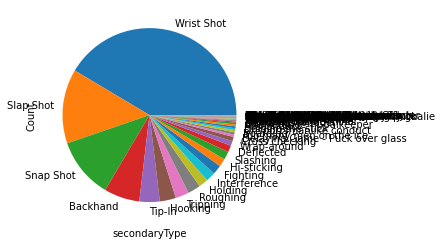

In [46]:
#explore/visualize secondtype column
game_plays['secondaryType'].value_counts().plot(kind='pie')
plt.xlabel('secondaryType')
plt.ylabel('Count')


wrists shot,Snap Shot and Slap Shot are the top three  popular shot type in  the game

# Explore the second dataset - game

In [21]:
# check game file for data types
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 26305 non-null  int64 
 1   season                  26305 non-null  int64 
 2   type                    26305 non-null  object
 3   date_time_GMT           26305 non-null  object
 4   away_team_id            26305 non-null  int64 
 5   home_team_id            26305 non-null  int64 
 6   away_goals              26305 non-null  int64 
 7   home_goals              26305 non-null  int64 
 8   outcome                 26305 non-null  object
 9   home_rink_side_start    25109 non-null  object
 10  venue                   26305 non-null  object
 11  venue_link              26305 non-null  object
 12  venue_time_zone_id      26305 non-null  object
 13  venue_time_zone_offset  26305 non-null  int64 
 14  venue_time_zone_tz      26305 non-null  object
dtypes:

In [22]:
# get an overview of the values each column contains
# .describe() only analyzes numeric columns by default
games.describe()

,game_id,season,away_team_id,home_team_id,away_goals,home_goals,venue_time_zone_offset
count,2.630500e+04,2.630500e+04,26305.000000,26305.000000,26305.000000,26305.000000,26305.000000
mean,2.010765e+09,2.010945e+07,16.879377,16.881429,2.687968,2.958981,-5.066147
std,6.073568e+06,6.073849e+04,11.184920,11.205625,1.619068,1.689031,1.210145
min,2.000020e+09,2.000200e+07,1.000000,1.000000,0.000000,0.000000,-8.000000
25%,2.006020e+09,2.006201e+07,8.000000,8.000000,1.000000,2.000000,-6.000000
50%,2.011021e+09,2.011201e+07,16.000000,16.000000,3.000000,3.000000,-5.000000
75%,2.016030e+09,2.016202e+07,24.000000,24.000000,4.000000,4.000000,-4.000000
max,2.019041e+09,2.019202e+07,90.000000,90.000000,11.000000,12.000000,-4.000000


In [23]:
# check all non-numeric columns
games.describe(include=np.object)

,type,date_time_GMT,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_tz
count,26305,26305,26305,25109,26305,26305,26305,26305
unique,3,14468,8,2,116,34,11,8
top,R,2019-11-28T00:00:00Z,home win REG,right,Madison Square Garden,/api/v1/venues/null,America/New_York,EDT
freq,25171,16,11256,13426,882,19352,11740,11997


In [24]:
#check data for any strong correlation - correlation matrix
games.corr()

,game_id,season,away_team_id,home_team_id,away_goals,home_goals,venue_time_zone_offset
game_id,1.000000,1.000000,0.122027,0.121974,0.045446,0.037946,-0.200089
season,1.000000,1.000000,0.122022,0.121967,0.045448,0.037957,-0.200089
away_team_id,0.122027,0.122022,1.000000,0.240464,-0.017823,0.000306,-0.272322
home_team_id,0.121974,0.121967,0.240464,1.000000,-0.007909,0.000623,-0.637963
away_goals,0.045446,0.045448,-0.017823,-0.007909,1.000000,-0.045941,0.002077
home_goals,0.037946,0.037957,0.000306,0.000623,-0.045941,1.000000,-0.008749
venue_time_zone_offset,-0.200089,-0.200089,-0.272322,-0.637963,0.002077,-0.008749,1.000000


Text(0, 0.5, 'Count')

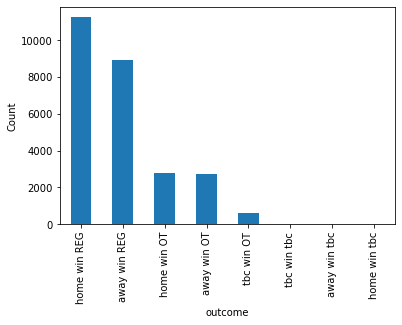

In [49]:
#explore/visualize age column
games['outcome'].value_counts().plot(kind='bar')
plt.xlabel('outcome')
plt.ylabel('Count')

Home win in regular game is more than away game. In OT game, home and away games are same

# Explore the third dataset - team feature

In [31]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

In [32]:
team_stats.describe()

,game_id,team_id,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
count,5.261000e+04,52610.000000,52602.000000,52602.000000,47682.000000,52602.000000,52602.000000,52602.000000,30462.000000,47682.000000,47682.000000,47682.000000
mean,2.010765e+09,16.880403,2.781282,29.930744,21.127449,11.754838,3.693567,0.667674,49.967179,8.832977,6.745040,13.317352
std,6.073510e+06,11.195171,1.657257,6.896107,9.237332,9.029566,1.870606,0.813093,7.326322,5.478274,4.144502,5.581261
min,2.000020e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.006020e+09,8.000000,2.000000,25.000000,15.000000,6.000000,2.000000,0.000000,45.200000,5.000000,4.000000,10.000000
50%,2.011021e+09,16.000000,3.000000,30.000000,20.000000,10.000000,3.000000,0.000000,50.000000,8.000000,6.000000,13.000000
75%,2.016030e+09,24.000000,4.000000,34.000000,27.000000,15.000000,5.000000,1.000000,54.800000,12.000000,9.000000,17.000000
max,2.019041e+09,90.000000,12.000000,88.000000,80.000000,213.000000,16.000000,7.000000,79.200000,52.000000,40.000000,62.000000


In [33]:
#check data for any strong correlation - correlation matrix
team_stats.corr()

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
game_id,1.000000,0.122000,0.035644,0.037271,0.154728,0.342978,-0.282431,-0.344502,-0.092124,-0.001894,0.133770,0.145461,0.278443
team_id,0.122000,1.000000,-0.001185,-0.007874,-0.019162,0.011246,-0.044171,-0.032043,-0.014289,0.009204,-0.028017,-0.002926,-0.005821
won,0.035644,-0.001185,1.000000,0.596658,0.025200,-0.039339,-0.040231,0.014049,0.240823,0.030458,-0.004803,0.104937,0.166406
goals,0.037271,-0.007874,0.596658,1.000000,0.150048,-0.064944,0.038303,0.097074,0.459827,0.035202,0.012130,0.095462,0.093338
shots,0.154728,-0.019162,0.025200,0.150048,1.000000,0.050009,-0.082409,0.120679,0.083634,0.138162,0.048839,0.099960,-0.074203
hits,0.342978,0.011246,-0.039339,-0.064944,0.050009,1.000000,-0.062390,-0.187209,-0.073287,0.003448,0.202028,0.165264,0.291648
pim,-0.282431,-0.044171,-0.040231,0.038303,-0.082409,-0.062390,1.000000,0.290575,0.125317,-0.008737,-0.067719,-0.068962,-0.063378
powerPlayOpportunities,-0.344502,-0.032043,0.014049,0.097074,0.120679,-0.187209,0.290575,1.000000,0.416477,0.045209,-0.011836,-0.059365,-0.163430
powerPlayGoals,-0.092124,-0.014289,0.240823,0.459827,0.083634,-0.073287,0.125317,0.416477,1.000000,0.024791,-0.001385,0.014879,0.008025
faceOffWinPercentage,-0.001894,0.009204,0.030458,0.035202,0.138162,0.003448,-0.008737,0.045209,0.024791,1.000000,0.068740,0.059343,-0.080402


In [34]:
# Clean version of correlation matrix (visualize)
corr = team_stats.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
game_id,1.00,0.12,0.04,0.04,0.15,0.34,-0.28,-0.34,-0.09,-0.00,0.13,0.15,0.28
team_id,0.12,1.00,-0.00,-0.01,-0.02,0.01,-0.04,-0.03,-0.01,0.01,-0.03,-0.00,-0.01
won,0.04,-0.00,1.00,0.60,0.03,-0.04,-0.04,0.01,0.24,0.03,-0.00,0.10,0.17
goals,0.04,-0.01,0.60,1.00,0.15,-0.06,0.04,0.10,0.46,0.04,0.01,0.10,0.09
shots,0.15,-0.02,0.03,0.15,1.00,0.05,-0.08,0.12,0.08,0.14,0.05,0.10,-0.07
hits,0.34,0.01,-0.04,-0.06,0.05,1.00,-0.06,-0.19,-0.07,0.00,0.20,0.17,0.29
pim,-0.28,-0.04,-0.04,0.04,-0.08,-0.06,1.00,0.29,0.13,-0.01,-0.07,-0.07,-0.06
powerPlayOpportunities,-0.34,-0.03,0.01,0.10,0.12,-0.19,0.29,1.00,0.42,0.05,-0.01,-0.06,-0.16
powerPlayGoals,-0.09,-0.01,0.24,0.46,0.08,-0.07,0.13,0.42,1.00,0.02,-0.00,0.01,0.01
faceOffWinPercentage,-0.00,0.01,0.03,0.04,0.14,0.00,-0.01,0.05,0.02,1.00,0.07,0.06,-0.08


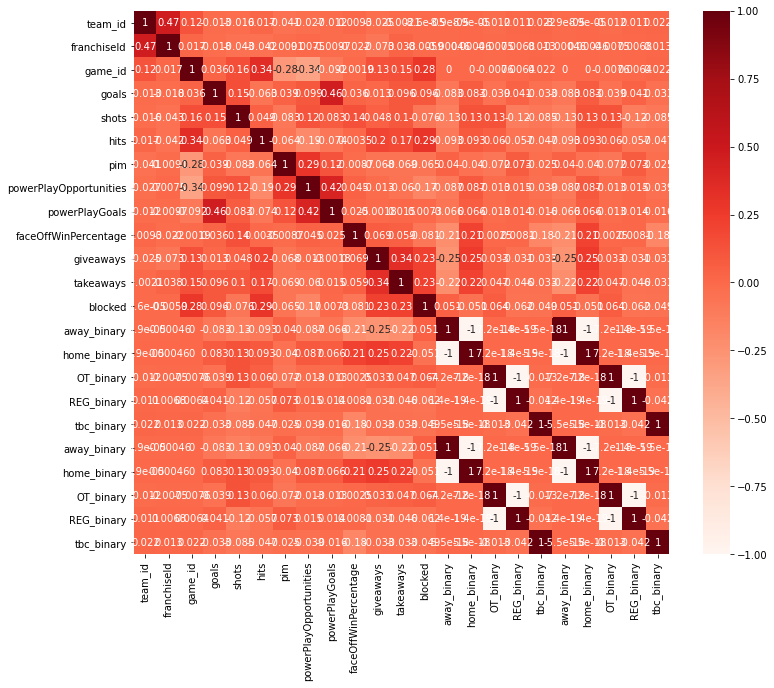

In [65]:
plt.figure(figsize=(12,10))
cor = teams.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()